In [1]:
# load libraries here
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

## Preliminary Exploratory Data Analysis

### Reading in the Dataset

In [2]:
# CHANGE THIS TO GITHUB URL !!!
bills_data <- read_delim("https://raw.githubusercontent.com/gordnzhou/DSCI-100-project/main/fake_bills.csv", delim = ";")

head(bills_data)

Rows: 1500 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (6): diagonal, height_left, height_right, margin_low, margin_up, length
lgl (1): is_genuine

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,171.81,104.86,104.95,4.52,2.89,112.83
TRUE,171.46,103.36,103.66,3.77,2.99,113.09
TRUE,172.69,104.48,103.50,4.40,2.94,113.16
TRUE,171.36,103.91,103.94,3.62,3.01,113.51
TRUE,171.73,104.28,103.46,4.04,3.48,112.54
TRUE,172.17,103.74,104.08,4.42,2.95,112.81


### Data Wrangling

In [3]:
bills_data <- bills_data |>
    drop_na() |>
    mutate(is_genuine = as_factor(is_genuine)) |>
    mutate(is_genuine = fct_recode(is_genuine, "Real" = "TRUE", "Fake" = "FALSE"))

head(bills_data)

is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Real,171.81,104.86,104.95,4.52,2.89,112.83
Real,171.46,103.36,103.66,3.77,2.99,113.09
Real,172.69,104.48,103.50,4.40,2.94,113.16
Real,171.36,103.91,103.94,3.62,3.01,113.51
Real,171.73,104.28,103.46,4.04,3.48,112.54
Real,172.17,103.74,104.08,4.42,2.95,112.81


### Summary and Visualization of Training Data

In [4]:
set.seed(99)

bills_split <- initial_split(bills_data, prop = 0.75, strata = is_genuine)

bills_train <- training(bills_split)
bills_test <- testing(bills_split)

In [5]:
na_count <- sum(is.na(bills_train))
na_count

bills_count <- bills_train |>
    group_by(is_genuine) |>
    summarize(count = n())
bills_count

bills_means <- bills_train |>
    select(diagonal:length) |>
    map_df(mean)

bills_means

[1] 0

is_genuine,count
<fct>,<int>
Fake,369
Real,728


diagonal,height_left,height_right,margin_low,margin_up,length
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
171.9582,104.0336,103.9237,4.488523,3.146545,112.6754


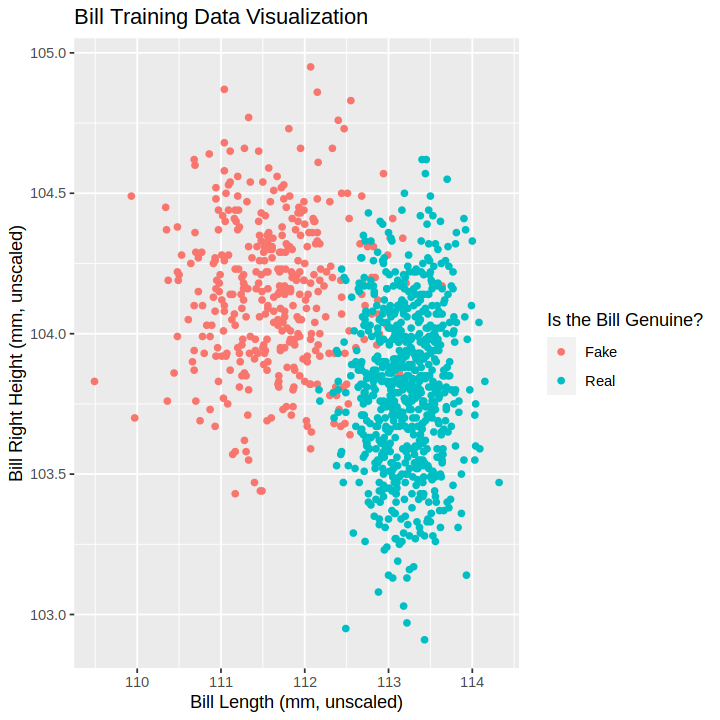

In [6]:
options(repr.plot.width = 6, repr.plot.height = 6)

bills_train_plot <- bills_train |>
    ggplot(aes(x = length, y = height_right, colour = is_genuine)) +
        ggtitle("Bill Training Data Visualization") +
        geom_point() +
        labs(x = "Bill Length (mm, unscaled)",
             y = "Bill Right Height (mm, unscaled)",
             colour = "Is the Bill Genuine?")

bills_train_plot